# Ensemble Learning
Cette technique consiste à utiliser un certain nombre de modèles ensemble afin d'obtenir une meilleure performance que d'utiliser chaque modèle séparemment.

## The Wisdom of the Crowd : 
  **Une foule d'individus a souvent bien plus raison qu'un seul expert, à condition que la foule soit : *grande, compétente (+50%) et diversifiée (avis différents = Oui et Non)***

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

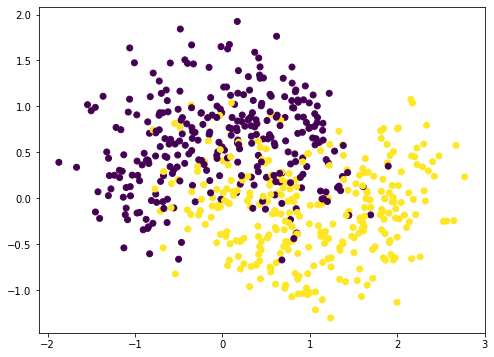

In [23]:
# Générer un Dataset (jeu de données)
X, y = make_moons(n_samples=600, noise=0.4, random_state=0)

# Visualiser les deux 1ères données
plt.figure(figsize=(8, 6))
# Les données en fonction de leur classes
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [24]:
# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### - Voting Classifier : *Deux méthode de votes*
- **Hard Voting : Vote sur les prédictions**
- **Soft Voting : Vote sur les probabilités de chaque classe**

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [34]:
# 1er modèle
model_1 = SGDClassifier(random_state=0)
# 2nd modèle
model_2 = DecisionTreeClassifier(random_state=0)
# 3ème modèle
model_3 = KNeighborsClassifier(n_neighbors=3)
# 4ème modèle, le modèle d'ensemble contenant tous les 3 modèles avec la technique de voting
# Par défaut, la technique de voting est "hard"
model_4 = VotingClassifier([("SGD", model_1),
                          ("Tree", model_2), 
                          ("KNN", model_3)])

In [35]:
# Créer un modèle à partir des 4 modèles et l'entrainer sur les données de train
for model in (model_1, model_2, model_3, model_4):
    
    # Entrainement du modèle sur les données de train
    model.fit(X_train, y_train)
    # Afficher le nom de chaque modèle avec son score d'évaluation sur les données test
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.8333333333333334
DecisionTreeClassifier 0.8333333333333334
KNeighborsClassifier 0.8666666666666667
VotingClassifier 0.8583333333333333


### - Bagging
**A utiliser lorsque les modèles singuliers ont tendance à faire de l'overfitting**

In [36]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [38]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(), 
                         n_estimators=150)

# Entrainer le modèle sur les données de train
model.fit(X_train, y_train)
# Evaluer (tester) le modèle sur les données de test
model.score(X_test, y_test)

0.85

In [41]:
# Utilisation avec le RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, max_depth=100)
# max_depth = taille maxi des arbres que l'on veut avoir

# Entrainer le modèle sur les données de train
model.fit(X_train, y_train)
# Evaluer (tester) le modèle sur les données de test
model.score(X_test, y_test)

0.8416666666666667

### - Boosting
**A utilisr lorsque les modèles ont du mal à atteindre une bonne performance simplement sur le train set**

In [43]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [44]:
model = AdaBoostClassifier(n_estimators=150)

# Entrainer le modèle sur les données de train
model.fit(X_train, y_train)
# Evaluer (tester) le modèle sur les données de test
model.score(X_test, y_test)

0.8333333333333334

### - Stacking
**Très utile si vous avez passé plus de temps à entrainer vos modèles de façon individuelles mais il tient à noter que cette technique est la plus lente parmi toutes les techniques d'ensemble**

In [46]:
from sklearn.ensemble import StackingClassifier

In [47]:
model_4 = StackingClassifier([("SGD", model_1),
                          ("Tree", model_2), 
                          ("KNN", model_3)],
                          final_estimator=KNeighborsClassifier())

# Entrainer le modèle sur les données de train
model.fit(X_train, y_train)
# Evaluer (tester) le modèle sur les données de test
model.score(X_test, y_test)

0.8333333333333334